In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import History
import pandas as pd
from sklearn import  metrics
from sklearn.datasets import make_moons
from keras.callbacks import History
from mlxtend.plotting import plot_decision_regions

Wczytanie danych, usunięcie brakujących wartości, nadanie etykiet

In [4]:
train_set = pd.read_csv('adult/adult.data', sep=", ", header=None, engine='python')
test_set = pd.read_csv('adult/adult.test', sep=", ", skiprows=1, header=None, engine='python')

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
              'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train, test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0, '<=50K': 0, '>50K.': 1, '>50K': 1})

dataset.drop(["fnlwgt"], axis=1, inplace=True)
dataset.drop(["education"], axis=1, inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()
d = dict(pd.cut(x[x.index != " United-States"], 5, labels=range(5)))
dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset, drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class", axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class", axis=1)
y_test = test.wage_class

# Zad
Nauczmy model z BatchNormalization

Pamiętaj, że 

* BatchNormalization powinno być dodane przed funkcją katywacji
* ustaw parametr use_bias=False

In [7]:
history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

2024-06-07 03:42:03.915373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-06-07 03:42:03.915446: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2024-06-07 03:42:03.915493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kjUbuntu): /proc/driver/nvidia/version does not exist
2024-06-07 03:42:03.916128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5000      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 50)                0

In [8]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [9]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 9s 7ms/step - loss: 0.4391 - accuracy: 0.7947 - val_loss: 0.4784 - val_accuracy: 0.7904
Epoch 2/100
943/943 [==============================] - 6s 6ms/step - loss: 0.3860 - accuracy: 0.8127 - val_loss: 0.4700 - val_accuracy: 0.7917
Epoch 3/100
943/943 [==============================] - 7s 7ms/step - loss: 0.3674 - accuracy: 0.8229 - val_loss: 0.4472 - val_accuracy: 0.7920
Epoch 4/100
943/943 [==============================] - 7s 8ms/step - loss: 0.3676 - accuracy: 0.8214 - val_loss: 0.4824 - val_accuracy: 0.7633
Epoch 5/100
943/943 [==============================] - 7s 7ms/step - loss: 0.3659 - accuracy: 0.8219 - val_loss: 0.5411 - val_accuracy: 0.7596
Epoch 6/100
943/943 [==============================] - 6s 6ms/step - loss: 0.3649 - accuracy: 0.8228 - val_loss: 0.4467 - val_accuracy: 0.7758
Epoch 7/100
943/943 [==============================] - 6s 7ms/step - loss: 0.3556 - accuracy: 0.8293 - val_loss: 0.4407 - val_accuracy: 0.7963

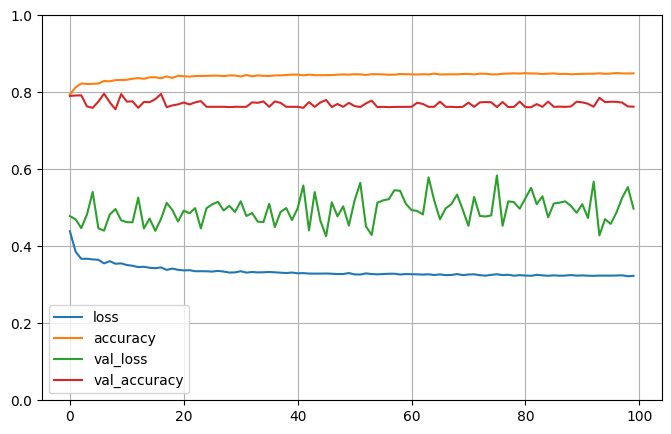

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 4ms/step - loss: 0.4979 - accuracy: 0.7626


[0.4978501796722412, 0.7626162171363831]

In [15]:
metrics.accuracy_score(y_true=y_test, y_pred=np.argmax(model.predict(X_test), axis=-1) )

471/471 [==============================] - 2s 4ms/step


0.7543160690571049

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




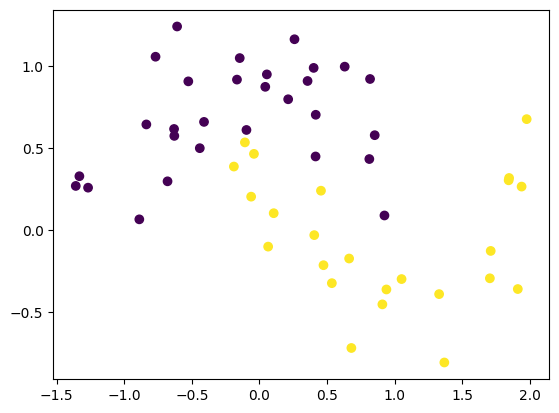

In [17]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [19]:
history_model1 = History()
model1 = Sequential()
model1.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model1.add(Dense(500,activation="relu"))
model1.add(Dense(200,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))
model1.summary()

model1.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
model1.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_model1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              3000      
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 200)               100200    
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 603,901
Trainable params: 603,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 2s 307ms/step - loss: 0.6619 - accuracy: 0.7170 - val_loss: 0.5947 - val_accuracy: 0.7447
Epoch 2/1000
2/2 [====================

In [20]:
history_model2 = History()

model2 = Sequential()
model2.add(Dense(1000,input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Activation("sigmoid"))
model2.add(Dense(500))
model2.add(BatchNormalization())
model2.add(Activation("sigmoid"))
model2.add(Dense(200))
model2.add(BatchNormalization())
model2.add(Activation("sigmoid"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()

model2.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
model2.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_model2])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              3000      
                                                                 
 batch_normalization_3 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 500)               500500    
                                                                 
 batch_normalization_4 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 500)              

In [22]:
histories = [history_model1, history_model2]
labels = ["model", "model with BatchNormalization"]
models = [model1, model2]

In [23]:
def plot_learning_curves(history, ax=None, label=''):
    ax = ax or plt.gca()
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='val_loss ')
    ax.set_title(label)
    ax.set_ylim([0, 1])
    ax.set_xlim([0, 1000])
    ax.legend()

In [24]:
def plot_boundaries(model, *, ax=None, plot_training=True, title=None):
    ax = ax or plt.gca()
    plot_decision_regions(X_test, y_test, model, ax=ax)
    ax.set_title(title)
    if plot_training:
        ax.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 'bs', label='train 0')
        ax.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 'r^', label='train 1')
        ax.legend()

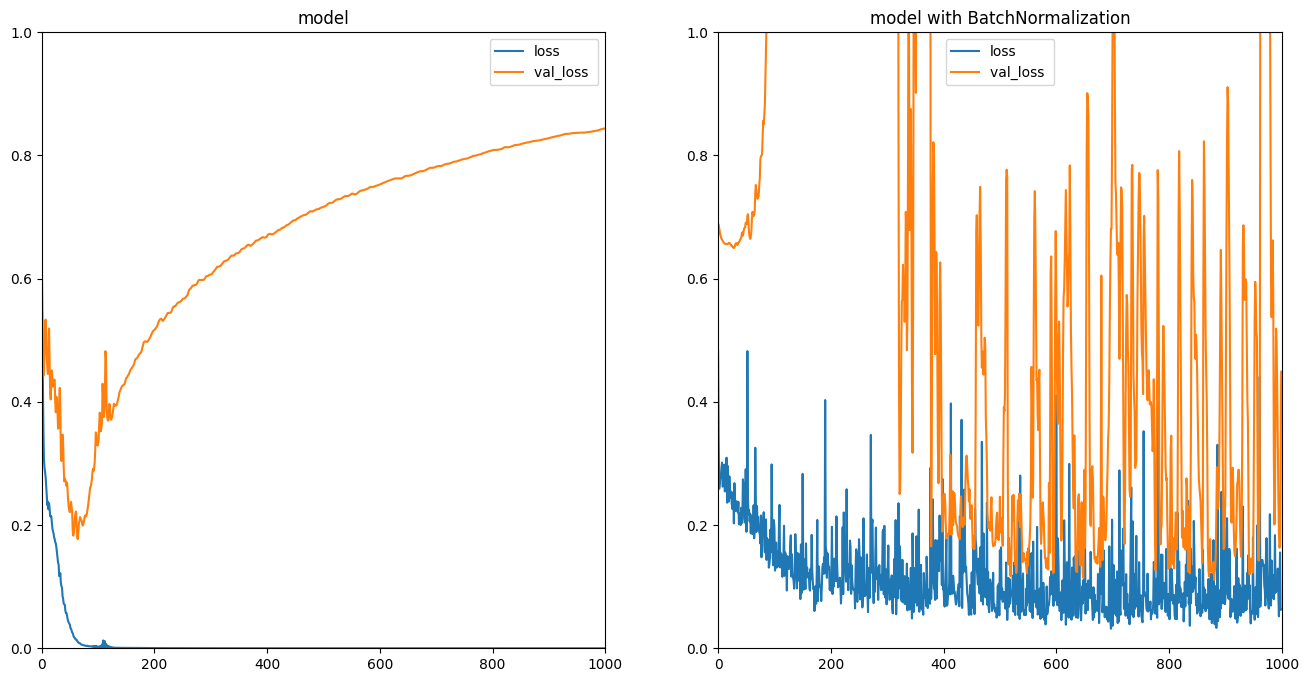

In [25]:
_, axs = plt.subplots(1, 2, figsize=(16, 8))

for model, label, ax in zip(histories, labels, axs.flatten()):
    plot_learning_curves(model, ax, label)

40000/40000 [==============================] - 175s 4ms/step


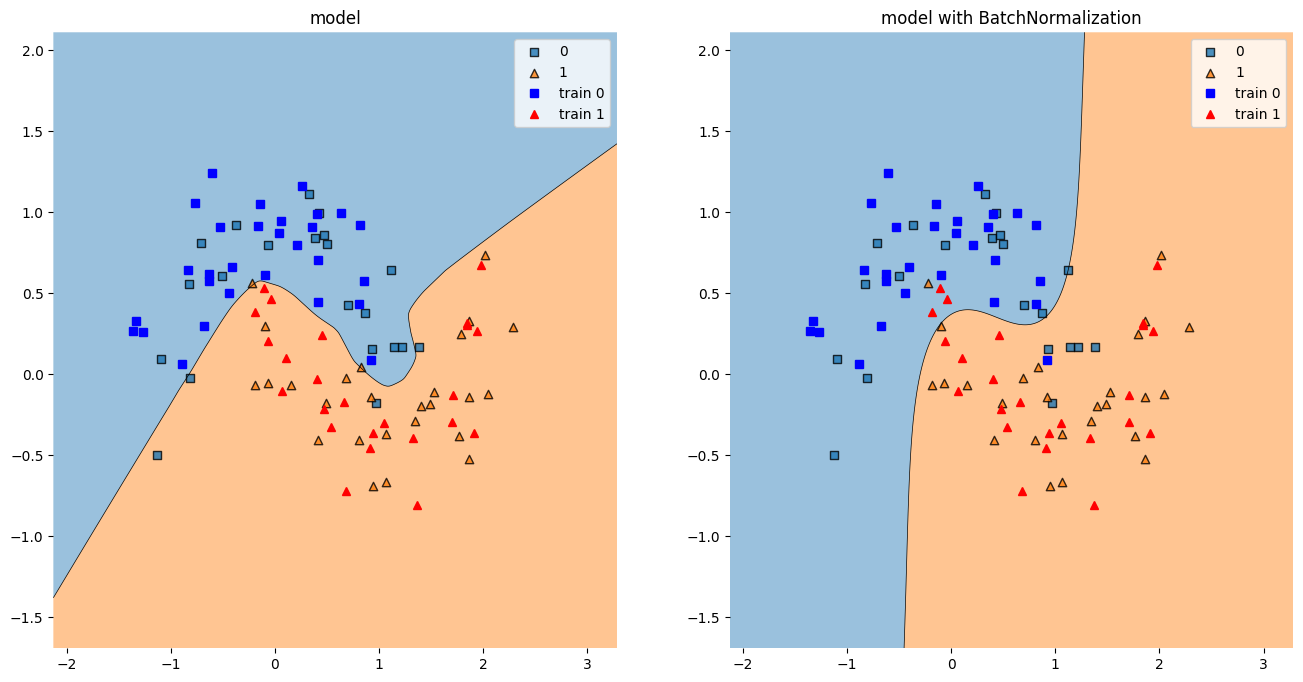

In [26]:
_, axs = plt.subplots(1, 2, figsize=(16, 8))

for model, label, ax in zip(models, labels, axs.flatten()):
    plot_boundaries(model, ax=ax, title=label)